In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv("/Users/mariannadiamanta/Desktop/ACES/B2Measurements.txt", delimiter=';', encoding='utf-16')
#df.head()
df

,FID,VID,X,Y,Z,Picture,Accuracy
0,1,1,45778.164,378623.891,3.487,NaN,0.011
1,2,1,45780.530,378627.793,3.666,NaN,0.011
2,3,1,45836.656,378590.480,1.653,NaN,0.011
3,4,1,45836.656,378590.480,1.653,NaN,0.011
4,5,1,45842.095,378581.963,1.715,NaN,0.012
5,6,1,45842.095,378581.963,1.715,NaN,0.012
6,7,1,45842.095,378581.963,1.715,NaN,0.012
7,8,1,45848.162,378569.741,1.834,NaN,0.012
8,9,1,45848.162,378569.741,1.834,NaN,0.012
9,10,1,45848.162,378569.741,1.834,NaN,0.012


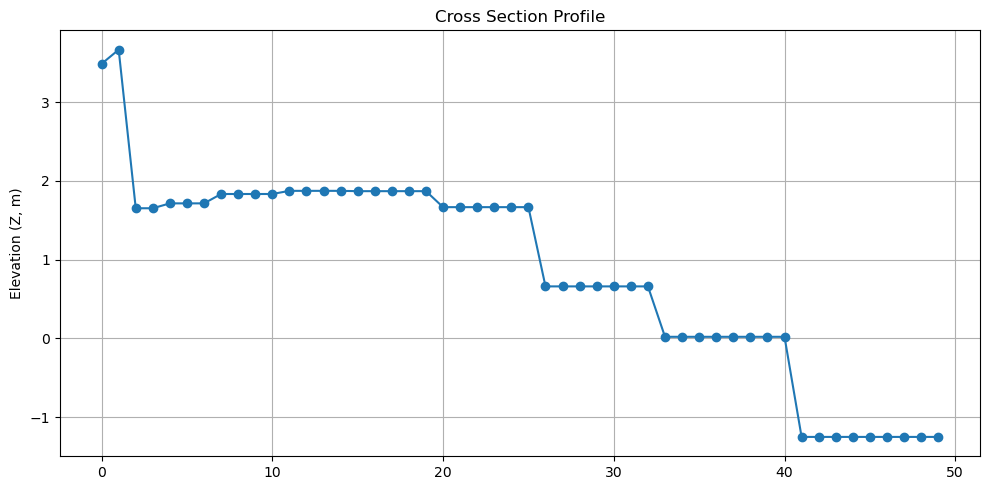

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Z'], marker='o', linestyle='-')
plt.ylabel('Elevation (Z, m)')
plt.title('Cross Section Profile')
plt.grid(True)
plt.tight_layout()
plt.show()
